In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import Dense, Dropout, Normalization, BatchNormalization, LayerNormalization, Input

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_parquet("../data/structured/general/combined_data.parquet")
df.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,...,Power / vane opening,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,1598.477449,1480.989528,1684.261611,1601.366508,...,3.185623,1.0,1.0,1.506435,115.477449,43.989528,72.261611,3.366508,6.588478,38.823883
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,1598.479316,1481.003188,1684.270504,1601.374254,...,3.184514,1.0,2.0,1.505561,115.479316,44.003188,72.270504,3.374254,6.583464,38.841318
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,1598.490184,1481.028827,1684.270683,1601.383179,...,3.183404,1.0,3.0,1.504687,115.490184,44.028827,72.270683,3.383179,6.581384,38.843245
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,1598.494073,1481.059017,1684.271062,1601.378391,...,3.182294,1.0,4.0,1.503294,115.494073,44.059017,72.271062,3.378391,6.591746,38.872300
1970-12-19 09:51:49,261.704362,3.170510,82.266336,174.422046,5312.533396,107.964254,1598.498916,1481.075521,1684.276622,1601.380601,...,3.181184,1.0,5.0,1.500409,115.498916,44.075521,72.276622,3.380601,6.607884,38.924469


In [4]:
df.describe()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,...,Power / vane opening,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
count,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,...,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06,1.749961e+06
mean,2.977607e+02,5.989512e+00,9.106108e+01,1.577147e+02,5.312684e+03,1.079544e+02,1.613281e+03,1.490366e+03,1.690256e+03,1.602897e+03,...,3.254471e+00,1.271643e+00,1.009752e+05,1.927217e+00,1.302806e+02,5.336638e+01,7.825604e+01,4.897468e+00,8.422110e+00,4.371091e+01
std,3.384608e+01,8.155852e+00,8.703910e+00,1.908742e+01,2.985366e+01,2.861297e+00,1.063498e+01,6.476825e+00,4.674188e+00,2.256257e+00,...,1.962570e-01,1.080437e+02,1.017059e+05,3.294724e-01,1.063498e+01,6.476825e+00,4.674188e+00,2.256257e+00,1.999206e+00,4.533404e+00
min,0.000000e+00,-3.811665e+01,8.600623e-03,1.353587e+02,3.621803e+03,6.264306e-01,1.522557e+03,1.425511e+03,1.665702e+03,1.549427e+03,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.955655e+01,-1.148883e+01,5.370227e+01,-4.857322e+01,-4.121649e+01,-2.710137e+01
25%,3.069066e+02,0.000000e+00,9.331236e+01,1.488042e+02,5.298512e+03,1.080113e+02,1.604473e+03,1.484863e+03,1.686002e+03,1.602373e+03,...,3.273256e+00,1.000000e+00,2.026700e+04,1.975362e+00,1.214735e+02,4.786252e+01,7.400235e+01,4.372724e+00,7.915592e+00,4.075378e+01
50%,3.098458e+02,6.300372e+00,9.404118e+01,1.516417e+02,5.303462e+03,1.080553e+02,1.611078e+03,1.489437e+03,1.689645e+03,1.603006e+03,...,3.289016e+00,1.000000e+00,5.873000e+04,2.044561e+00,1.280775e+02,5.243686e+01,7.764524e+01,5.005540e+00,8.457696e+00,4.195811e+01
75%,3.112799e+02,1.117101e+01,9.448438e+01,1.566872e+02,5.316881e+03,1.080889e+02,1.618607e+03,1.493730e+03,1.692938e+03,1.603348e+03,...,3.298681e+00,1.000000e+00,1.517740e+05,2.086107e+00,1.356071e+02,5.672995e+01,8.093788e+01,5.347677e+00,8.768625e+00,4.552583e+01
max,3.233023e+02,4.910232e+01,9.618052e+01,2.734938e+02,5.512772e+03,1.083688e+02,1.640510e+03,1.505455e+03,1.702324e+03,1.608264e+03,...,3.405552e+00,7.338400e+04,3.965850e+05,2.383355e+00,1.575097e+02,6.845494e+01,9.032409e+01,1.026434e+01,1.389574e+01,5.880415e+01


<AxesSubplot:>

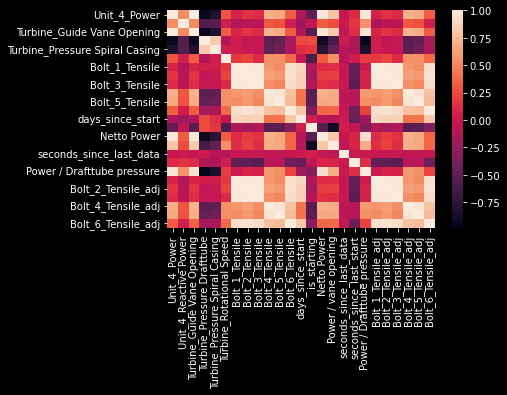

In [5]:
sns.heatmap(df.corr())

In [6]:
y_cols = df.iloc[:, 8:14]
X_cols = df.drop(columns=y_cols)

X_cols.head()


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Tensile,Bolt_2_Tensile,Netto Power,Power / vane opening,seconds_since_last_data,seconds_since_last_start,Power / Drafttube pressure,Bolt_1_Tensile_adj,Bolt_2_Tensile_adj,Bolt_3_Tensile_adj,Bolt_4_Tensile_adj,Bolt_5_Tensile_adj,Bolt_6_Tensile_adj
timepoints,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,1598.477449,1480.989528,258.759689,3.185623,1.0,1.0,1.506435,115.477449,43.989528,72.261611,3.366508,6.588478,38.823883
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,1598.479316,1481.003188,258.214106,3.184514,1.0,2.0,1.505561,115.479316,44.003188,72.270504,3.374254,6.583464,38.841318
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,1598.490184,1481.028827,257.668524,3.183404,1.0,3.0,1.504687,115.490184,44.028827,72.270683,3.383179,6.581384,38.843245
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,1598.494073,1481.059017,257.739592,3.182294,1.0,4.0,1.503294,115.494073,44.059017,72.271062,3.378391,6.591746,38.872300
1970-12-19 09:51:49,261.704362,3.170510,82.266336,174.422046,5312.533396,107.964254,1598.498916,1481.075521,258.533851,3.181184,1.0,5.0,1.500409,115.498916,44.075521,72.276622,3.380601,6.607884,38.924469


<AxesSubplot:xlabel='timepoints'>

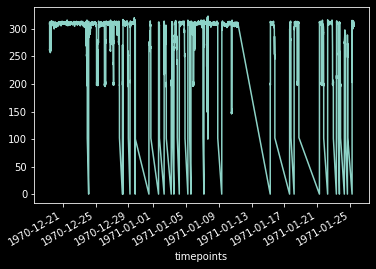

In [7]:
df["Unit_4_Power"].plot()

<AxesSubplot:xlabel='timepoints'>

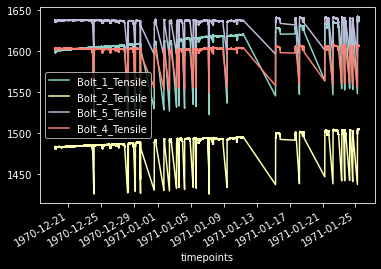

In [8]:
df[["Bolt_1_Tensile", "Bolt_2_Tensile", "Bolt_5_Tensile", "Bolt_4_Tensile"]].plot()

<AxesSubplot:xlabel='timepoints'>

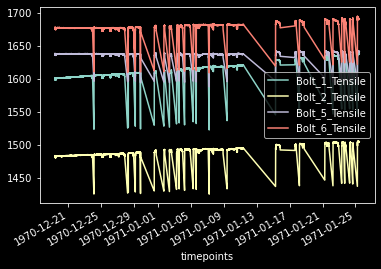

In [9]:
df[["Bolt_1_Tensile", "Bolt_2_Tensile", "Bolt_5_Tensile", "Bolt_6_Tensile"]].plot()

<AxesSubplot:xlabel='timepoints'>

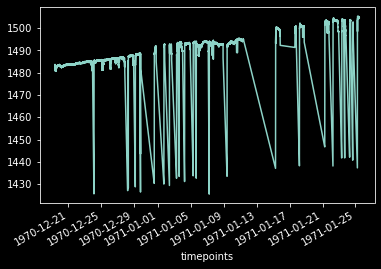

In [10]:
df["Bolt_2_Tensile"].fillna(method='ffill').plot()